In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.preprocessing.image import image_dataset_from_directory

#from tensorflow.keras.preprocessing.image import image_dataset_from_directory

In [35]:
keras.preprocessing.image_dataset_from_directory(
    'Data',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Cosmo','Margarita','Mojito'],
    seed = 7,
    validation_split = .2,
    subset = 'training')

Found 1412 files belonging to 3 classes.
Using 1130 files for training.


<BatchDataset shapes: ((None, 256, 256, 3), (None, 3)), types: (tf.float32, tf.float32)>

In [50]:
traindf = keras.preprocessing.image_dataset_from_directory(
    'Data',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Cosmo','Margarita','Mojito'],
    seed = 7,
    validation_split = .2,
    subset = 'training')

valdf = keras.preprocessing.image_dataset_from_directory(
    'Data',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Cosmo','Margarita','Mojito'],
    seed = 7,
    validation_split = .2,
    subset = 'validation')



Found 1412 files belonging to 3 classes.
Using 1130 files for training.
Found 1412 files belonging to 3 classes.
Using 282 files for validation.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout

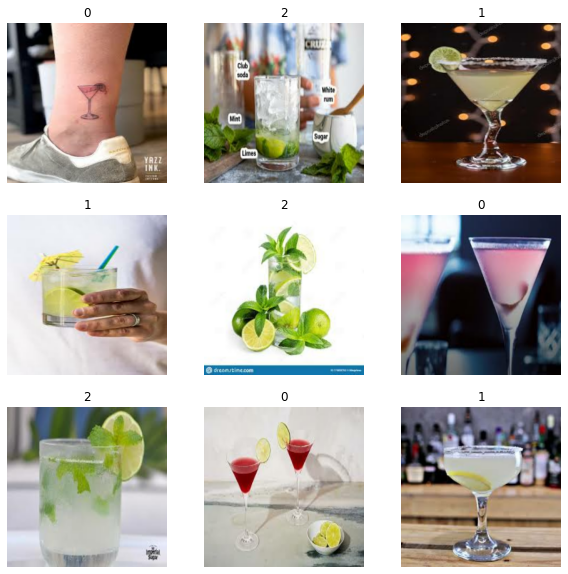

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in traindf.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [51]:
model = Sequential()

In [52]:
model.add(InputLayer(input_shape = (256, 256, 3)))

In [53]:
model.add(Conv2D(
            filters=10,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(MaxPooling2D())

model.add(Conv2D(
            filters=20,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(MaxPooling2D())

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(20, activation='relu'))

#model.add(Dropout(.20))

model.add(Dense(3, activation='softmax'))  # 3 target classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
model.summary()

model.fit(traindf, epochs=10, verbose=1, validation_data=valdf,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 256, 256, 10)      280       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 256, 256, 20)      1820      
_________________________________________________________________
global_average_pooling2d_8 ( (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 63        
Total params: 2,583
Trainable params: 2,583
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
36/36 [==============================] - 33s 801ms/step - loss: 2.0906 - accuracy: 0.4047 - val_loss: 0.89